# PDP 공정별 공정시간 정보

In [203]:
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 추검정 및 통계 분석 패키지
from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

In [204]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [205]:
# 데이터 구성하기: mycars 데이터 가져오기 (데이터의 경로 확인

# 파일명, 변수, 값 등에 한글 포함시 engine = "python" 지정
data = pd.read_csv("/home/piai/PDP/Data Set/MFG_TAT.csv", engine = "python", encoding='cp949')
data.head()

,JUDGE,INDEX,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,양품,1,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,양품,2,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,양품,3,LOT-101,PNL-03,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,...,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,양품,4,LOT-101,PNL-04,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,...,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,양품,5,LOT-101,PNL-05,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,...,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0


In [206]:
data['TAT_7PASTE']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3995    0.0
3996    0.0
3997    0.0
3998    0.0
3999    0.0
Name: TAT_7PASTE, Length: 4000, dtype: float64

In [211]:
data['TAT_7PASTE'].isnull().sum()

16

In [212]:
data['TAT_7PASTE'].value_counts()

0.0    3984
Name: TAT_7PASTE, dtype: int64

# # 총 불량률 10.675

#  # 시간 별 불량율

In [122]:
data

,JUDGE,INDEX,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,양품,1,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,양품,2,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,양품,3,LOT-101,PNL-03,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,...,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,양품,4,LOT-101,PNL-04,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,...,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,양품,5,LOT-101,PNL-05,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,...,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,명점,3996,LOT-300,PNL-16,2019-08-01 21:38,2019-08-02 2:58,2019-08-02 8:38,2019-08-07 11:18,2019-08-12 1:18,2019-08-04 14:38,...,6447.0,530.0,78.0,393.0,80.0,399.0,86.0,7016.0,0.0,10077.0
3996,양품,3997,LOT-300,PNL-17,2019-08-01 22:23,2019-08-02 3:43,2019-08-02 9:23,2019-08-07 12:03,2019-08-12 2:03,2019-08-04 15:23,...,NaN,530.0,80.0,405.0,78.0,402.0,78.0,6990.0,0.0,10075.0
3997,양품,3998,LOT-300,PNL-18,2019-08-01 23:07,2019-08-02 4:27,2019-08-02 10:07,2019-08-07 12:47,2019-08-12 2:47,2019-08-04 16:07,...,6447.0,540.0,78.0,375.0,100.0,360.0,84.0,7025.0,0.0,NaN
3998,명점,3999,LOT-300,PNL-19,2019-08-01 23:51,2019-08-02 5:11,2019-08-02 10:51,2019-08-07 13:31,2019-08-12 3:31,2019-08-04 16:51,...,6747.0,530.0,78.0,NaN,90.0,375.0,82.0,6960.0,0.0,9750.0


In [123]:
data_time = data[['JUDGE', 'LOT_ID']]

In [124]:
data_time

,JUDGE,LOT_ID
0,양품,LOT-101
1,양품,LOT-101
2,양품,LOT-101
3,양품,LOT-101
4,양품,LOT-101
...,...,...
3995,명점,LOT-300
3996,양품,LOT-300
3997,양품,LOT-300
3998,명점,LOT-300


In [125]:
data_time['JUDGE'] = np.where(data_time['JUDGE']=='양품', 0, 1)

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
data_time

,JUDGE,LOT_ID
0,0,LOT-101
1,0,LOT-101
2,0,LOT-101
3,0,LOT-101
4,0,LOT-101
...,...,...
3995,1,LOT-300
3996,0,LOT-300
3997,0,LOT-300
3998,1,LOT-300


In [127]:
grouped = data_time['JUDGE'].groupby(data_time['LOT_ID'])

In [128]:
grouped.mean()

LOT_ID
LOT-101    0.10
LOT-102    0.05
LOT-103    0.15
LOT-104    0.00
LOT-105    0.10
           ... 
LOT-296    0.15
LOT-297    0.10
LOT-298    0.20
LOT-299    0.20
LOT-300    0.15
Name: JUDGE, Length: 200, dtype: float64

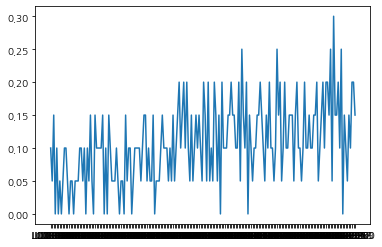

In [129]:
plt.plot(grouped.mean())

# ====== 이상치 처리 =======

In [ ]:
# 이상치 제거 코드
id = data2[data2['  '] < 350].index
data2.drop(id, inplace = True)
# data2 = data2.drop(id) 와 같은 코드임

In [131]:
# 히스토그램 겹쳐서 보여주는
def fun_plot_hist(data, var):
    plt.hist(data2[data2['JUDGE'] == '양품'][var], label = '양품', alpha = 0.5)  # alpha는 투명도
    plt.hist(data2[data2['JUDGE'] == '명점'][var], label = '명점', alpha = 0.5)
    plt.legend()

In [133]:
data2 = pd.read_csv("/home/piai/PDP/Data Set/MFG_TAT2.csv", engine = "python", encoding='cp949')
data2.head()

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,양품,1,LOT-101,PNL-01,86,220.0,83.0,74,160.0,416.0,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,양품,2,LOT-101,PNL-02,86,210.0,84.0,71,150.0,372.0,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,양품,3,LOT-101,PNL-03,78,220.0,78.0,69,148.0,368.0,...,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,양품,4,LOT-101,PNL-04,86,210.0,84.0,69,178.0,416.0,...,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,양품,5,LOT-101,PNL-05,86,210.0,84.0,69,132.0,380.0,...,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0


### < TAT_1BLACK_1PRINT >

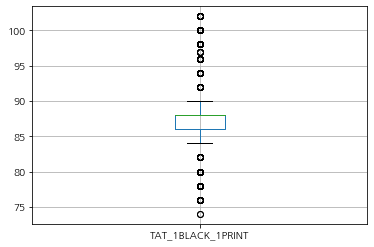

In [134]:
data2.boxplot(['TAT_1BLACK_1PRINT'])

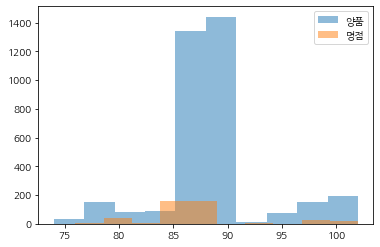

In [202]:
fun_plot_hist(data2, 'TAT_1BLACK_1PRINT')

In [135]:
data2['TAT_1BLACK_1PRINT'].describe()

count    4000.000000
mean       87.695250
std         4.709981
min        74.000000
25%        86.000000
50%        88.000000
75%        88.000000
max       102.000000
Name: TAT_1BLACK_1PRINT, dtype: float64

In [136]:
Q1 = data2['TAT_1BLACK_1PRINT'].quantile(.25)
Q3 = data2['TAT_1BLACK_1PRINT'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

86.0 88.0 2.0 83.0 91.0


#### - 이상치 제거 X

### < TAT_1BLACK_2RTD >

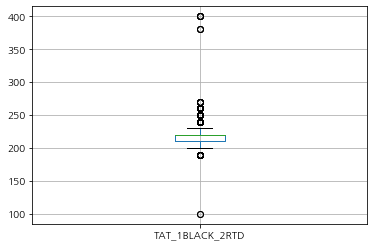

In [137]:
# Group별 boxplot
data2.boxplot(['TAT_1BLACK_2RTD'])

In [138]:
Q1 = data2['TAT_1BLACK_2RTD'].quantile(.25)
Q3 = data2['TAT_1BLACK_2RTD'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

210.0 220.0 10.0 195.0 235.0


In [139]:
outlier = data2[data2['TAT_1BLACK_2RTD'] > 350]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
121,명점,122,LOT-107,PNL-02,100,380.0,90.0,69,182.0,336.0,...,6540.0,540.0,82.0,444.0,100.0,345.0,88.0,6865.0,0.0,9750.0
623,양품,624,LOT-132,PNL-04,86,380.0,84.0,74,136.0,396.0,...,6447.0,530.0,78.0,399.0,96.0,330.0,98.0,7140.0,0.0,9750.0
980,양품,981,LOT-150,PNL-01,86,400.0,84.0,74,136.0,396.0,...,6447.0,530.0,80.0,363.0,98.0,396.0,98.0,7110.0,0.0,10074.0
1038,양품,1039,LOT-152,PNL-19,86,400.0,84.0,74,136.0,396.0,...,6447.0,530.0,78.0,399.0,96.0,330.0,98.0,7140.0,0.0,9750.0
1149,양품,1150,LOT-158,PNL-10,86,400.0,84.0,74,136.0,396.0,...,6447.0,530.0,78.0,399.0,98.0,330.0,98.0,7140.0,0.0,10077.0
1892,양품,1893,LOT-195,PNL-13,86,380.0,84.0,74,136.0,396.0,...,6447.0,530.0,78.0,399.0,98.0,330.0,98.0,7140.0,0.0,9750.0
3011,명점,3012,LOT-251,PNL-12,86,400.0,84.0,74,136.0,396.0,...,6447.0,530.0,80.0,363.0,98.0,396.0,98.0,7110.0,0.0,10074.0
3853,양품,3854,LOT-293,PNL-14,86,400.0,84.0,74,136.0,396.0,...,6447.0,530.0,80.0,363.0,98.0,396.0,98.0,7110.0,0.0,10074.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


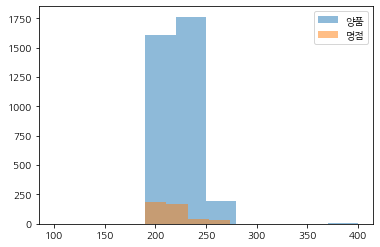

In [140]:
fun_plot_hist(data2, 'TAT_1BLACK_2RTD')

In [141]:
outlier = data2[data2['TAT_1BLACK_2RTD'] < 150]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
3065,양품,3066,LOT-254,PNL-06,98,100.0,84.0,72,164.0,380.0,...,6480.0,530.0,80.0,321.0,78.0,372.0,88.0,6750.0,0.0,9750.0
3907,양품,3908,LOT-296,PNL-08,98,100.0,84.0,72,164.0,380.0,...,6480.0,530.0,80.0,321.0,78.0,372.0,88.0,6750.0,0.0,9750.0


#### 1BLACK_2RTD 가 모두 100으로 동일하고, 다른 공정 과정 시간도 같은데 모두 양품으로 나옴  => 이상치로 판단하지 않겠음.

### < TAT_2AG_1PRINT >

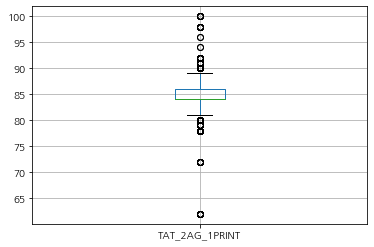

In [142]:
data2.boxplot(['TAT_2AG_1PRINT'])

In [143]:
Q1 = data2['TAT_2AG_1PRINT'].quantile(.25)
Q3 = data2['TAT_2AG_1PRINT'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

84.0 86.0 2.0 81.0 89.0


In [144]:
outlier = data2[data2['TAT_2AG_1PRINT'] < 65]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
666,양품,667,LOT-134,PNL-07,96,220.0,62.0,63,158.0,376.0,...,6453.0,530.0,80.0,387.0,76.0,396.0,84.0,7080.0,0.0,10074.0
1102,양품,1103,LOT-156,PNL-03,96,220.0,62.0,63,158.0,376.0,...,6453.0,530.0,78.0,381.0,78.0,396.0,84.0,7080.0,0.0,9750.0
2313,양품,2314,LOT-216,PNL-14,96,220.0,62.0,63,158.0,376.0,...,6453.0,530.0,78.0,381.0,78.0,396.0,84.0,7080.0,0.0,10075.0
2695,양품,2696,LOT-235,PNL-16,96,220.0,62.0,63,158.0,376.0,...,6453.0,530.0,78.0,354.0,80.0,393.0,84.0,7110.0,0.0,9750.0
2865,양품,2866,LOT-244,PNL-06,96,220.0,62.0,63,158.0,376.0,...,6453.0,530.0,80.0,387.0,76.0,396.0,84.0,7080.0,0.0,9750.0
2928,양품,2929,LOT-247,PNL-09,96,220.0,62.0,63,158.0,376.0,...,6453.0,530.0,80.0,387.0,76.0,396.0,84.0,7080.0,0.0,9750.0
3195,양품,3196,LOT-260,PNL-16,96,220.0,62.0,63,158.0,376.0,...,6453.0,530.0,78.0,381.0,78.0,396.0,84.0,7080.0,0.0,10075.0
3557,양품,3558,LOT-278,PNL-18,96,220.0,62.0,63,158.0,376.0,...,6453.0,530.0,78.0,354.0,80.0,393.0,84.0,7110.0,0.0,9750.0
3727,양품,3728,LOT-287,PNL-08,96,220.0,62.0,63,158.0,376.0,...,6453.0,530.0,80.0,387.0,76.0,396.0,84.0,7080.0,0.0,9750.0
3790,양품,3791,LOT-290,PNL-11,96,220.0,62.0,63,158.0,376.0,...,6453.0,530.0,80.0,387.0,76.0,396.0,84.0,7080.0,0.0,9750.0


#### TAT_5MGO 까지의 값을 보았을 때 모두 같은 소요 시간이 걸렸는데 모두 양품임 => 이상치라고 판단하지 X => 제거 X

/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


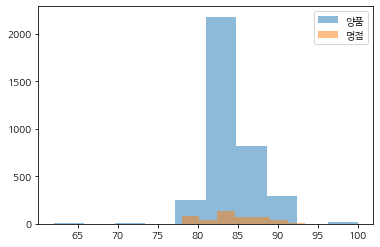

In [145]:
fun_plot_hist(data2, 'TAT_2AG_1PRINT')

### < TAT_2AG_2RTD >

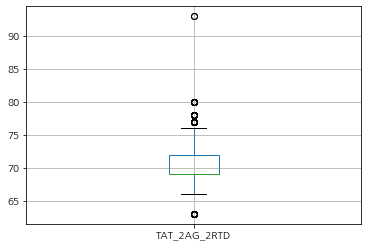

In [146]:
data2.boxplot(['TAT_2AG_2RTD'])

In [147]:
Q1 = data2['TAT_2AG_2RTD'].quantile(.25)
Q3 = data2['TAT_2AG_2RTD'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

69.0 72.0 3.0 64.5 76.5


In [148]:
outlier = data2[data2['TAT_2AG_2RTD'] > 90]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
2310,양품,2311,LOT-216,PNL-11,86,220.0,NaN,93,118.0,372.0,...,6540.0,540.0,78.0,372.0,98.0,327.0,80.0,6810.0,0.0,9750.0
3192,양품,3193,LOT-260,PNL-13,86,220.0,NaN,93,118.0,372.0,...,6540.0,540.0,78.0,372.0,98.0,327.0,80.0,6810.0,0.0,9750.0


#### TAT_2AG_2RTD 를 제외한 모든 속성값이 같은 조건인데 모두 양품임 => 이상치로 고려하지 않겠다.

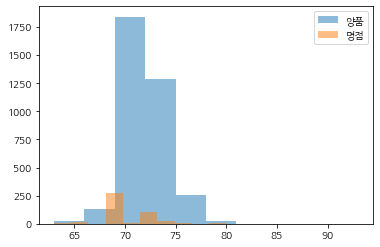

In [149]:
fun_plot_hist(data2, 'TAT_2AG_2RTD')

### < TAT_2AG_3EXPOSURE >

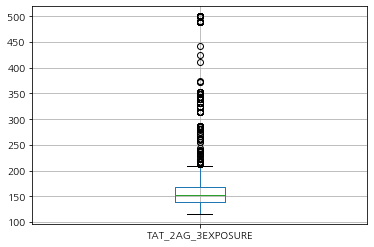

In [150]:
data2.boxplot(['TAT_2AG_3EXPOSURE'])

In [151]:
Q1 = data2['TAT_2AG_3EXPOSURE'].quantile(.25)
Q3 = data2['TAT_2AG_3EXPOSURE'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

140.0 168.0 28.0 98.0 210.0


In [152]:
data2['TAT_2AG_3EXPOSURE'].describe()

count    3912.000000
mean      162.116053
std        43.652727
min       116.000000
25%       140.000000
50%       152.000000
75%       168.000000
max       500.000000
Name: TAT_2AG_3EXPOSURE, dtype: float64

In [153]:
outlier = data2[data2['TAT_2AG_3EXPOSURE'] > 450]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
65,양품,66,LOT-104,PNL-06,98,210.0,88.0,69,500.0,348.0,...,NaN,530.0,78.0,447.0,76.0,399.0,76.0,7016.0,0.0,10076.0
74,양품,75,LOT-104,PNL-15,86,210.0,84.0,69,498.0,384.0,...,6453.0,530.0,80.0,402.0,98.0,396.0,84.0,7140.0,0.0,9750.0
229,양품,230,LOT-112,PNL-10,98,220.0,88.0,69,500.0,336.0,...,NaN,530.0,76.0,393.0,78.0,372.0,84.0,6964.0,0.0,9749.0
378,명점,379,LOT-119,PNL-19,88,210.0,86.0,66,500.0,340.0,...,6780.0,530.0,80.0,504.0,78.0,399.0,88.0,7230.0,0.0,10074.0
462,양품,463,LOT-124,PNL-03,78,230.0,80.0,69,488.0,356.0,...,6573.0,530.0,80.0,NaN,78.0,399.0,86.0,6840.0,0.0,10077.0
491,양품,492,LOT-125,PNL-12,78,230.0,80.0,69,488.0,356.0,...,6573.0,530.0,86.0,522.0,80.0,396.0,88.0,6840.0,0.0,9751.0
627,양품,628,LOT-132,PNL-08,78,230.0,80.0,69,488.0,356.0,...,6573.0,530.0,86.0,522.0,80.0,396.0,88.0,6840.0,0.0,9749.0
649,양품,650,LOT-133,PNL-10,86,210.0,84.0,69,500.0,384.0,...,6453.0,530.0,80.0,402.0,98.0,396.0,84.0,7140.0,0.0,10074.0
735,양품,736,LOT-137,PNL-16,86,210.0,84.0,69,500.0,384.0,...,6453.0,530.0,78.0,402.0,76.0,399.0,84.0,7140.0,0.0,10076.0
755,양품,756,LOT-138,PNL-16,98,220.0,88.0,69,500.0,336.0,...,NaN,530.0,82.0,597.0,78.0,396.0,84.0,6990.0,0.0,9750.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


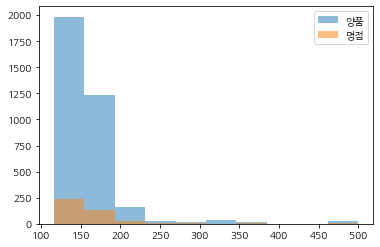

In [154]:
fun_plot_hist(data2, 'TAT_2AG_3EXPOSURE')

### < TAT_3BUS_1DEVELOP >

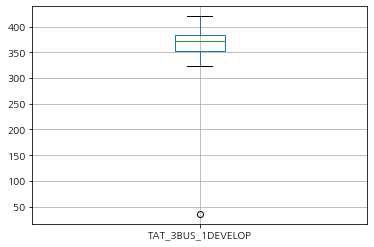

In [155]:
data2.boxplot(['TAT_3BUS_1DEVELOP'])

In [156]:
Q1 = data2['TAT_3BUS_1DEVELOP'].quantile(.25)
Q3 = data2['TAT_3BUS_1DEVELOP'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

352.0 384.0 32.0 304.0 432.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


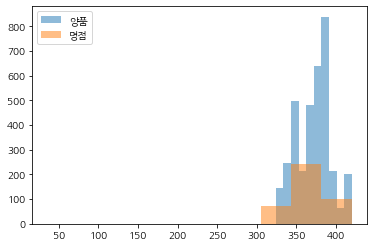

In [157]:
fun_plot_hist(data2, 'TAT_3BUS_1DEVELOP')

In [158]:
outlier = data2[data2['TAT_3BUS_1DEVELOP'] < 50]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
1341,명점,1342,LOT-168,PNL-02,98,230.0,100.0,69,142.0,36.0,...,NaN,820.0,78.0,387.0,78.0,399.0,78.0,6985.0,0.0,9749.0


# ######## 이상치 제거

In [159]:
data2.dropna(  )

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,양품,1,LOT-101,PNL-01,86,220.0,83.0,74,160.0,416.0,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,양품,2,LOT-101,PNL-02,86,210.0,84.0,71,150.0,372.0,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,양품,3,LOT-101,PNL-03,78,220.0,78.0,69,148.0,368.0,...,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,양품,4,LOT-101,PNL-04,86,210.0,84.0,69,178.0,416.0,...,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,양품,5,LOT-101,PNL-05,86,210.0,84.0,69,132.0,380.0,...,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,양품,3993,LOT-300,PNL-13,88,210.0,84.0,69,160.0,384.0,...,6480.0,530.0,80.0,369.0,80.0,396.0,86.0,7140.0,0.0,9749.0
3993,양품,3994,LOT-300,PNL-14,86,220.0,87.0,69,142.0,356.0,...,6540.0,530.0,78.0,393.0,100.0,399.0,100.0,6930.0,0.0,10077.0
3994,양품,3995,LOT-300,PNL-15,88,210.0,82.0,72,162.0,384.0,...,6513.0,540.0,78.0,375.0,76.0,312.0,84.0,7170.0,0.0,9750.0
3995,명점,3996,LOT-300,PNL-16,86,220.0,86.0,69,202.0,328.0,...,6447.0,530.0,78.0,393.0,80.0,399.0,86.0,7016.0,0.0,10077.0


### < TAT_3BUS_2FIRE >

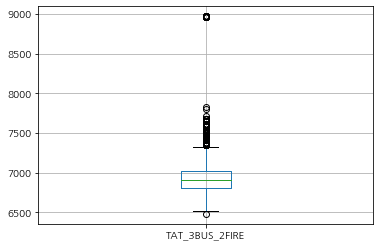

In [160]:
data2.boxplot(['TAT_3BUS_2FIRE'])

In [161]:
Q1 = data2['TAT_3BUS_2FIRE'].quantile(.25)
Q3 = data2['TAT_3BUS_2FIRE'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

6807.0 7020.0 213.0 6487.5 7339.5


In [217]:
outlier = data2[data2['TAT_3BUS_2FIRE'] > 8900]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
372,양품,373,LOT-119,PNL-13,86,220.0,84.0,72,142.0,384.0,...,6453.0,540.0,76.0,315.0,76.0,309.0,90.0,6810.0,0.0,10076.0
456,양품,457,LOT-123,PNL-17,86,220.0,84.0,72,142.0,384.0,...,6453.0,540.0,80.0,321.0,78.0,354.0,90.0,6754.0,0.0,10076.0
1012,양품,1013,LOT-151,PNL-13,86,220.0,84.0,72,142.0,384.0,...,6453.0,540.0,80.0,303.0,98.0,312.0,90.0,6780.0,0.0,10076.0
1018,양품,1019,LOT-151,PNL-19,88,260.0,84.0,69,140.0,420.0,...,6480.0,530.0,78.0,387.0,80.0,393.0,84.0,7140.0,0.0,9749.0
1165,양품,1166,LOT-159,PNL-06,88,260.0,84.0,69,140.0,420.0,...,6480.0,530.0,78.0,387.0,100.0,399.0,82.0,7140.0,0.0,9749.0
1491,양품,1492,LOT-175,PNL-12,86,220.0,84.0,72,142.0,384.0,...,6453.0,540.0,78.0,318.0,78.0,327.0,92.0,6780.0,0.0,9749.0
1785,명점,1786,LOT-190,PNL-06,86,220.0,84.0,72,142.0,384.0,...,6453.0,540.0,80.0,303.0,100.0,312.0,90.0,6780.0,0.0,10076.0
2150,명점,2151,LOT-208,PNL-11,88,260.0,84.0,69,140.0,420.0,...,6480.0,530.0,78.0,387.0,100.0,399.0,82.0,7140.0,0.0,9751.0
2199,양품,2200,LOT-210,PNL-20,88,260.0,84.0,69,140.0,420.0,...,6480.0,530.0,78.0,387.0,78.0,396.0,84.0,7170.0,0.0,10076.0
2270,양품,2271,LOT-214,PNL-11,88,260.0,84.0,69,140.0,420.0,...,6480.0,530.0,78.0,387.0,100.0,399.0,82.0,7140.0,0.0,10076.0


In [218]:
outlier.drop(['PANEL_ID'], axis=1)



,JUDGE,INDEX,LOT_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
372,양품,373,LOT-119,86,220.0,84.0,72,142.0,384.0,8973.0,6453.0,540.0,76.0,315.0,76.0,309.0,90.0,6810.0,0.0,10076.0
456,양품,457,LOT-123,86,220.0,84.0,72,142.0,384.0,8973.0,6453.0,540.0,80.0,321.0,78.0,354.0,90.0,6754.0,0.0,10076.0
1012,양품,1013,LOT-151,86,220.0,84.0,72,142.0,384.0,8973.0,6453.0,540.0,80.0,303.0,98.0,312.0,90.0,6780.0,0.0,10076.0
1018,양품,1019,LOT-151,88,260.0,84.0,69,140.0,420.0,8967.0,6480.0,530.0,78.0,387.0,80.0,393.0,84.0,7140.0,0.0,9749.0
1165,양품,1166,LOT-159,88,260.0,84.0,69,140.0,420.0,8967.0,6480.0,530.0,78.0,387.0,100.0,399.0,82.0,7140.0,0.0,9749.0
1491,양품,1492,LOT-175,86,220.0,84.0,72,142.0,384.0,8973.0,6453.0,540.0,78.0,318.0,78.0,327.0,92.0,6780.0,0.0,9749.0
1785,명점,1786,LOT-190,86,220.0,84.0,72,142.0,384.0,8973.0,6453.0,540.0,80.0,303.0,100.0,312.0,90.0,6780.0,0.0,10076.0
2150,명점,2151,LOT-208,88,260.0,84.0,69,140.0,420.0,8967.0,6480.0,530.0,78.0,387.0,100.0,399.0,82.0,7140.0,0.0,9751.0
2199,양품,2200,LOT-210,88,260.0,84.0,69,140.0,420.0,8967.0,6480.0,530.0,78.0,387.0,78.0,396.0,84.0,7170.0,0.0,10076.0
2270,양품,2271,LOT-214,88,260.0,84.0,69,140.0,420.0,8967.0,6480.0,530.0,78.0,387.0,100.0,399.0,82.0,7140.0,0.0,10076.0


# ###### 이상치 제거

/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


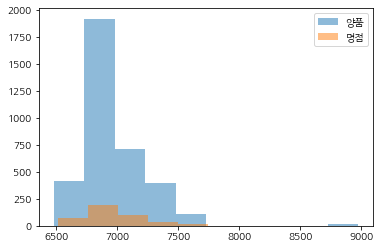

In [163]:
fun_plot_hist(data2, 'TAT_3BUS_2FIRE')

### < TAT_4DIELEC_FIRE >

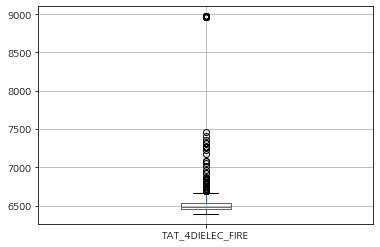

In [164]:
data2.boxplot(['TAT_4DIELEC_FIRE'])

In [165]:
Q1 = data2['TAT_4DIELEC_FIRE'].quantile(.25)
Q3 = data2['TAT_4DIELEC_FIRE'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

6453.0 6540.0 87.0 6322.5 6670.5


In [166]:
outlier = data2[data2['TAT_4DIELEC_FIRE'] > 8700]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
127,양품,128,LOT-107,PNL-08,86,250.0,84.0,69,146.0,364.0,...,8973.0,530.0,90.0,405.0,80.0,399.0,86.0,7260.0,0.0,9750.0
275,양품,276,LOT-114,PNL-16,86,250.0,84.0,69,146.0,364.0,...,8973.0,530.0,100.0,393.0,86.0,381.0,86.0,7316.0,0.0,10074.0
356,양품,357,LOT-118,PNL-17,88,210.0,88.0,72,186.0,332.0,...,8967.0,540.0,98.0,372.0,78.0,306.0,84.0,7200.0,0.0,9751.0
501,양품,502,LOT-126,PNL-02,88,210.0,88.0,72,186.0,332.0,...,8967.0,540.0,78.0,372.0,78.0,312.0,86.0,7170.0,0.0,10074.0
505,양품,506,LOT-126,PNL-06,86,220.0,84.0,69,184.0,372.0,...,8973.0,540.0,80.0,408.0,76.0,399.0,84.0,6960.0,0.0,10074.0
767,양품,768,LOT-139,PNL-08,88,210.0,88.0,72,186.0,332.0,...,8967.0,540.0,98.0,372.0,78.0,306.0,84.0,7200.0,0.0,10075.0
938,양품,939,LOT-147,PNL-19,88,210.0,88.0,72,186.0,332.0,...,8967.0,540.0,78.0,372.0,78.0,312.0,86.0,7170.0,0.0,10076.0
1450,양품,1451,LOT-173,PNL-11,86,220.0,84.0,69,184.0,372.0,...,8973.0,540.0,92.0,432.0,80.0,393.0,84.0,6960.0,0.0,10073.0
1451,양품,1452,LOT-173,PNL-12,86,220.0,84.0,69,184.0,372.0,...,8973.0,540.0,92.0,432.0,80.0,393.0,84.0,6960.0,0.0,9750.0
1539,양품,1540,LOT-177,PNL-20,86,220.0,84.0,69,184.0,372.0,...,8973.0,540.0,96.0,432.0,78.0,369.0,82.0,6964.0,0.0,10076.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


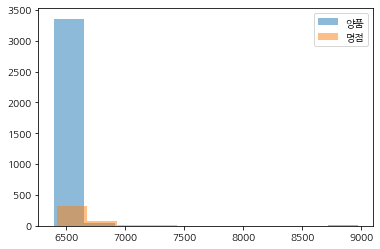

In [167]:
fun_plot_hist(data2, 'TAT_4DIELEC_FIRE')

# #######이상치 제거

### < TAT_5MGO >

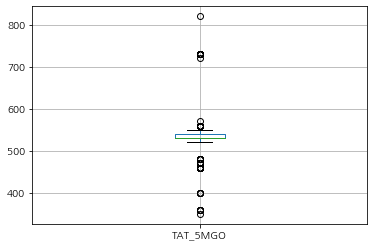

In [168]:
data2.boxplot(['TAT_5MGO'])

In [169]:
Q1 = data2['TAT_5MGO'].quantile(.25)
Q3 = data2['TAT_5MGO'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

530.0 540.0 10.0 515.0 555.0


In [170]:
outlier = data2[data2['TAT_5MGO'] > 450]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,양품,1,LOT-101,PNL-01,86,220.0,83.0,74,160.0,416.0,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,양품,2,LOT-101,PNL-02,86,210.0,84.0,71,150.0,372.0,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,양품,3,LOT-101,PNL-03,78,220.0,78.0,69,148.0,368.0,...,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,양품,4,LOT-101,PNL-04,86,210.0,84.0,69,178.0,416.0,...,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,양품,5,LOT-101,PNL-05,86,210.0,84.0,69,132.0,380.0,...,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,명점,3996,LOT-300,PNL-16,86,220.0,86.0,69,202.0,328.0,...,6447.0,530.0,78.0,393.0,80.0,399.0,86.0,7016.0,0.0,10077.0
3996,양품,3997,LOT-300,PNL-17,87,220.0,86.0,69,174.0,336.0,...,NaN,530.0,80.0,405.0,78.0,402.0,78.0,6990.0,0.0,10075.0
3997,양품,3998,LOT-300,PNL-18,84,210.0,82.0,72,280.0,392.0,...,6447.0,540.0,78.0,375.0,100.0,360.0,84.0,7025.0,0.0,NaN
3998,명점,3999,LOT-300,PNL-19,86,220.0,84.0,69,164.0,376.0,...,6747.0,530.0,78.0,NaN,90.0,375.0,82.0,6960.0,0.0,9750.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


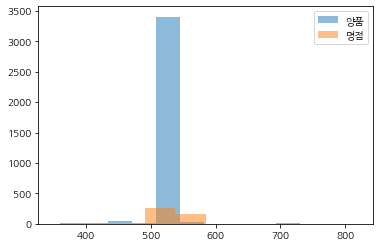

In [171]:
fun_plot_hist(data2, 'TAT_5MGO')

### < TAT_6PHOS_1R_1DISPENSER >

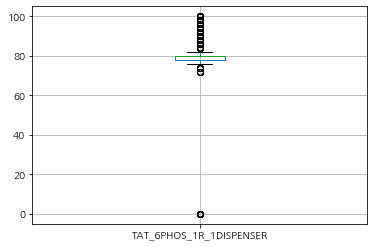

In [172]:
data2.boxplot(['TAT_6PHOS_1R_1DISPENSER'])

In [173]:
Q1 = data2['TAT_6PHOS_1R_1DISPENSER'].quantile(.25)
Q3 = data2['TAT_6PHOS_1R_1DISPENSER'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

78.0 80.0 2.0 75.0 83.0


In [174]:
outlier = data2[data2['TAT_6PHOS_1R_1DISPENSER'] < 5]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
95,양품,96,LOT-105,PNL-16,92,210.0,84.0,74,174.0,380.0,...,6453.0,540.0,0.0,429.0,0.0,384.0,0.0,7285.0,0.0,9750.0
152,양품,153,LOT-108,PNL-13,87,210.0,84.0,66,148.0,384.0,...,6420.0,530.0,0.0,327.0,0.0,399.0,0.0,7170.0,0.0,9749.0
262,양품,263,LOT-114,PNL-03,86,220.0,84.0,72,184.0,364.0,...,6480.0,530.0,0.0,429.0,0.0,384.0,0.0,7285.0,0.0,10073.0
373,양품,374,LOT-119,PNL-14,86,210.0,84.0,69,138.0,416.0,...,6633.0,530.0,0.0,378.0,78.0,324.0,0.0,6900.0,0.0,9750.0
496,양품,497,LOT-125,PNL-17,86,210.0,91.0,74,178.0,416.0,...,6600.0,530.0,0.0,378.0,78.0,324.0,0.0,6900.0,0.0,9749.0
529,양품,530,LOT-127,PNL-10,86,210.0,83.0,72,NaN,NaN,...,6447.0,540.0,0.0,441.0,0.0,396.0,0.0,7286.0,0.0,9750.0
630,명점,631,LOT-132,PNL-11,88,220.0,90.0,69,136.0,368.0,...,6480.0,540.0,0.0,306.0,86.0,396.0,88.0,NaN,0.0,9750.0
975,양품,976,LOT-149,PNL-16,98,210.0,83.0,69,136.0,384.0,...,6480.0,530.0,0.0,438.0,0.0,396.0,0.0,7290.0,0.0,9749.0
1150,양품,1151,LOT-158,PNL-11,88,220.0,84.0,69,134.0,380.0,...,6447.0,530.0,0.0,327.0,0.0,399.0,0.0,7170.0,0.0,10074.0
1164,명점,1165,LOT-159,PNL-05,86,220.0,84.0,72,184.0,364.0,...,6453.0,530.0,0.0,441.0,0.0,396.0,0.0,7286.0,0.0,10073.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


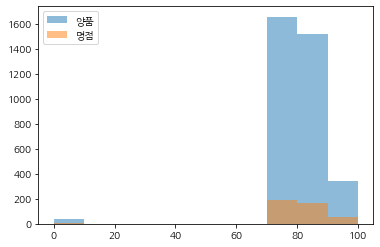

In [175]:
fun_plot_hist(data2, 'TAT_6PHOS_1R_1DISPENSER')

# #########이상치 제거

### < TAT_6PHOS_1R_2DRY >

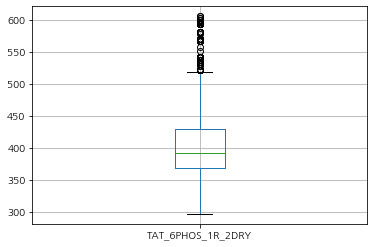

In [176]:
data2.boxplot(['TAT_6PHOS_1R_2DRY'])

In [177]:
Q1 = data2['TAT_6PHOS_1R_2DRY'].quantile(.25)
Q3 = data2['TAT_6PHOS_1R_2DRY'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

369.0 429.0 60.0 279.0 519.0


In [178]:
outlier = data2[data2['TAT_6PHOS_1R_2DRY'] > 450]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
21,명점,22,LOT-102,PNL-02,86,210.0,86.0,77,158.0,360.0,...,6660.0,530.0,98.0,459.0,94.0,396.0,84.0,6930.0,0.0,10076.0
22,양품,23,LOT-102,PNL-03,88,220.0,84.0,72,138.0,368.0,...,6540.0,530.0,80.0,477.0,78.0,396.0,86.0,6875.0,0.0,10073.0
25,양품,26,LOT-102,PNL-06,86,220.0,84.0,69,186.0,352.0,...,6600.0,530.0,78.0,582.0,86.0,399.0,84.0,6930.0,0.0,9751.0
45,양품,46,LOT-103,PNL-06,80,250.0,82.0,69,146.0,372.0,...,6507.0,530.0,96.0,510.0,80.0,396.0,86.0,7080.0,0.0,10075.0
48,양품,49,LOT-103,PNL-09,100,230.0,88.0,69,172.0,412.0,...,6480.0,530.0,78.0,597.0,78.0,369.0,100.0,6985.0,0.0,10075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,양품,3974,LOT-299,PNL-14,88,220.0,84.0,69,176.0,384.0,...,6453.0,540.0,78.0,597.0,76.0,396.0,84.0,7165.0,0.0,10077.0
3976,양품,3977,LOT-299,PNL-17,88,220.0,84.0,69,134.0,364.0,...,6453.0,530.0,82.0,459.0,78.0,318.0,84.0,7020.0,0.0,10076.0
3981,양품,3982,LOT-300,PNL-02,80,240.0,78.0,69,136.0,368.0,...,6573.0,530.0,80.0,522.0,90.0,399.0,NaN,6840.0,0.0,9751.0
3987,양품,3988,LOT-300,PNL-08,78,240.0,78.0,69,154.0,368.0,...,6573.0,540.0,78.0,492.0,90.0,396.0,88.0,6866.0,0.0,9749.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


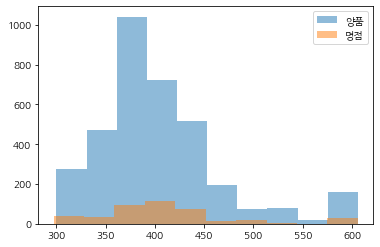

In [179]:
fun_plot_hist(data2, 'TAT_6PHOS_1R_2DRY')

### < TAT_6PHOS_2G_1DISPENSER >

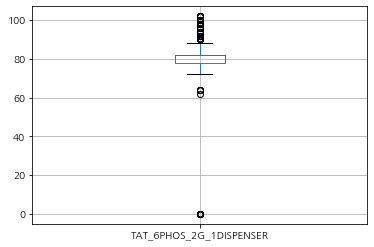

In [180]:
data2.boxplot(['TAT_6PHOS_2G_1DISPENSER'])

In [181]:
Q1 = data2['TAT_6PHOS_2G_1DISPENSER'].quantile(.25)
Q3 = data2['TAT_6PHOS_2G_1DISPENSER'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

78.0 82.0 4.0 72.0 88.0


In [182]:
outlier = data2[data2['TAT_6PHOS_2G_1DISPENSER'] < 5]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
95,양품,96,LOT-105,PNL-16,92,210.0,84.0,74,174.0,380.0,...,6453.0,540.0,0.0,429.0,0.0,384.0,0.0,7285.0,0.0,9750.0
152,양품,153,LOT-108,PNL-13,87,210.0,84.0,66,148.0,384.0,...,6420.0,530.0,0.0,327.0,0.0,399.0,0.0,7170.0,0.0,9749.0
262,양품,263,LOT-114,PNL-03,86,220.0,84.0,72,184.0,364.0,...,6480.0,530.0,0.0,429.0,0.0,384.0,0.0,7285.0,0.0,10073.0
529,양품,530,LOT-127,PNL-10,86,210.0,83.0,72,NaN,NaN,...,6447.0,540.0,0.0,441.0,0.0,396.0,0.0,7286.0,0.0,9750.0
975,양품,976,LOT-149,PNL-16,98,210.0,83.0,69,136.0,384.0,...,6480.0,530.0,0.0,438.0,0.0,396.0,0.0,7290.0,0.0,9749.0
1150,양품,1151,LOT-158,PNL-11,88,220.0,84.0,69,134.0,380.0,...,6447.0,530.0,0.0,327.0,0.0,399.0,0.0,7170.0,0.0,10074.0
1164,명점,1165,LOT-159,PNL-05,86,220.0,84.0,72,184.0,364.0,...,6453.0,530.0,0.0,441.0,0.0,396.0,0.0,7286.0,0.0,10073.0
1408,양품,1409,LOT-171,PNL-09,88,210.0,84.0,74,144.0,416.0,...,6453.0,460.0,0.0,327.0,0.0,399.0,0.0,7170.0,0.0,10073.0
1457,양품,1458,LOT-173,PNL-18,86,240.0,84.0,69,130.0,384.0,...,6453.0,530.0,0.0,441.0,0.0,396.0,0.0,7286.0,0.0,10076.0
1474,양품,1475,LOT-174,PNL-15,92,210.0,84.0,74,174.0,380.0,...,6453.0,540.0,0.0,429.0,0.0,384.0,0.0,7285.0,0.0,9750.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


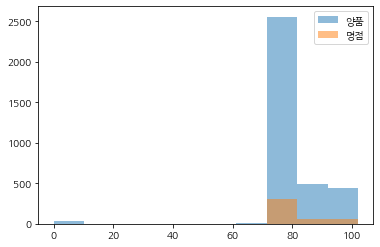

In [183]:
fun_plot_hist(data2, 'TAT_6PHOS_2G_1DISPENSER')

# ########이상치 제거

### < TAT_6PHOS_2G_2DRY >

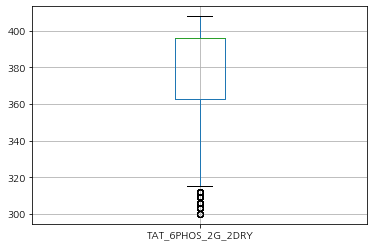

In [184]:
data2.boxplot(['TAT_6PHOS_2G_2DRY'])

In [185]:
Q1 = data2['TAT_6PHOS_2G_2DRY'].quantile(.25)
Q3 = data2['TAT_6PHOS_2G_2DRY'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

363.0 396.0 33.0 313.5 445.5


In [186]:
outlier = data2[data2['TAT_6PHOS_2G_2DRY'] < 375]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
6,양품,7,LOT-101,PNL-07,87,200.0,88.0,75,150.0,352.0,...,6480.0,540.0,82.0,387.0,78.0,324.0,86.0,7110.0,0.0,9751.0
7,양품,8,LOT-101,PNL-08,87,200.0,88.0,75,150.0,352.0,...,6480.0,540.0,76.0,390.0,78.0,345.0,84.0,7110.0,0.0,9751.0
8,양품,9,LOT-101,PNL-09,86,210.0,85.0,75,190.0,332.0,...,6453.0,540.0,78.0,390.0,78.0,330.0,84.0,7080.0,0.0,10075.0
12,명점,13,LOT-101,PNL-13,80,230.0,84.0,72,150.0,396.0,...,6540.0,530.0,80.0,387.0,78.0,306.0,78.0,6870.0,0.0,10074.0
19,명점,20,LOT-101,PNL-20,98,220.0,82.0,72,152.0,376.0,...,6687.0,540.0,98.0,336.0,100.0,309.0,100.0,6960.0,0.0,10074.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,명점,3990,LOT-300,PNL-10,88,220.0,90.0,72,174.0,408.0,...,6600.0,530.0,78.0,396.0,100.0,372.0,84.0,6900.0,0.0,10075.0
3990,양품,3991,LOT-300,PNL-11,86,250.0,84.0,72,136.0,380.0,...,6480.0,530.0,78.0,390.0,78.0,312.0,78.0,6994.0,0.0,10074.0
3991,양품,3992,LOT-300,PNL-12,98,220.0,88.0,69,500.0,336.0,...,NaN,530.0,88.0,369.0,78.0,351.0,92.0,6990.0,0.0,10073.0
3994,양품,3995,LOT-300,PNL-15,88,210.0,82.0,72,162.0,384.0,...,6513.0,540.0,78.0,375.0,76.0,312.0,84.0,7170.0,0.0,9750.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


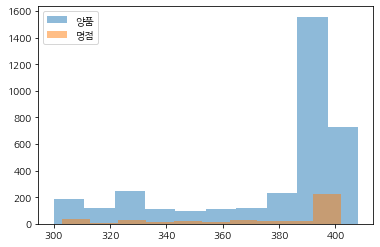

In [187]:
fun_plot_hist(data2, 'TAT_6PHOS_2G_2DRY')

### < TAT_6PHOS_3B_1DISPENSER >

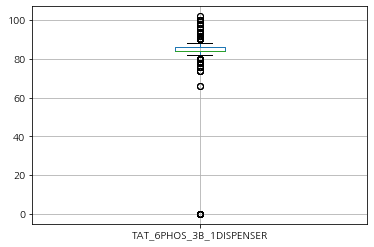

In [188]:
data2.boxplot(['TAT_6PHOS_3B_1DISPENSER'])

In [189]:
Q1 = data2['TAT_6PHOS_3B_1DISPENSER'].quantile(.25)
Q3 = data2['TAT_6PHOS_3B_1DISPENSER'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

84.0 86.0 2.0 81.0 89.0


In [190]:
outlier = data2[data2['TAT_6PHOS_3B_1DISPENSER'] < 5]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
95,양품,96,LOT-105,PNL-16,92,210.0,84.0,74,174.0,380.0,...,6453.0,540.0,0.0,429.0,0.0,384.0,0.0,7285.0,0.0,9750.0
152,양품,153,LOT-108,PNL-13,87,210.0,84.0,66,148.0,384.0,...,6420.0,530.0,0.0,327.0,0.0,399.0,0.0,7170.0,0.0,9749.0
262,양품,263,LOT-114,PNL-03,86,220.0,84.0,72,184.0,364.0,...,6480.0,530.0,0.0,429.0,0.0,384.0,0.0,7285.0,0.0,10073.0
373,양품,374,LOT-119,PNL-14,86,210.0,84.0,69,138.0,416.0,...,6633.0,530.0,0.0,378.0,78.0,324.0,0.0,6900.0,0.0,9750.0
496,양품,497,LOT-125,PNL-17,86,210.0,91.0,74,178.0,416.0,...,6600.0,530.0,0.0,378.0,78.0,324.0,0.0,6900.0,0.0,9749.0
529,양품,530,LOT-127,PNL-10,86,210.0,83.0,72,NaN,NaN,...,6447.0,540.0,0.0,441.0,0.0,396.0,0.0,7286.0,0.0,9750.0
975,양품,976,LOT-149,PNL-16,98,210.0,83.0,69,136.0,384.0,...,6480.0,530.0,0.0,438.0,0.0,396.0,0.0,7290.0,0.0,9749.0
1150,양품,1151,LOT-158,PNL-11,88,220.0,84.0,69,134.0,380.0,...,6447.0,530.0,0.0,327.0,0.0,399.0,0.0,7170.0,0.0,10074.0
1164,명점,1165,LOT-159,PNL-05,86,220.0,84.0,72,184.0,364.0,...,6453.0,530.0,0.0,441.0,0.0,396.0,0.0,7286.0,0.0,10073.0
1408,양품,1409,LOT-171,PNL-09,88,210.0,84.0,74,144.0,416.0,...,6453.0,460.0,0.0,327.0,0.0,399.0,0.0,7170.0,0.0,10073.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


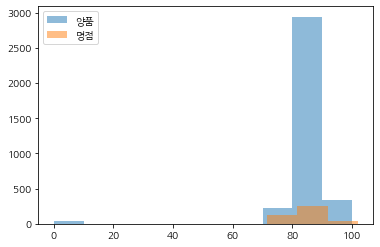

In [191]:
fun_plot_hist(data2, 'TAT_6PHOS_3B_1DISPENSER')

### < TAT_6PHOS_4FIRE >

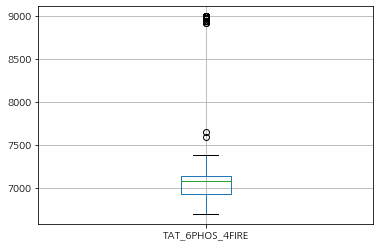

In [192]:
data2.boxplot(['TAT_6PHOS_4FIRE'])

In [193]:
Q1 = data2['TAT_6PHOS_4FIRE'].quantile(.25)
Q3 = data2['TAT_6PHOS_4FIRE'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

6930.0 7140.0 210.0 6615.0 7455.0


In [194]:
outlier = data2[data2['TAT_6PHOS_4FIRE'] > 8500]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
14,양품,15,LOT-101,PNL-15,86,210.0,82.0,72,148.0,352.0,...,6573.0,530.0,80.0,363.0,100.0,396.0,84.0,8996.0,0.0,10076.0
15,양품,16,LOT-101,PNL-16,86,220.0,84.0,69,152.0,348.0,...,6567.0,530.0,78.0,366.0,80.0,396.0,78.0,8970.0,0.0,9750.0
36,양품,37,LOT-102,PNL-17,86,190.0,84.0,72,216.0,372.0,...,6573.0,530.0,76.0,351.0,72.0,366.0,84.0,8970.0,0.0,9750.0
44,명점,45,LOT-103,PNL-05,88,220.0,92.0,69,146.0,352.0,...,6540.0,530.0,78.0,366.0,80.0,396.0,78.0,8970.0,0.0,10075.0
47,양품,48,LOT-103,PNL-08,88,210.0,78.0,69,136.0,368.0,...,6540.0,530.0,78.0,438.0,76.0,396.0,76.0,8970.0,0.0,10074.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,양품,3869,LOT-294,PNL-09,88,220.0,92.0,69,146.0,352.0,...,6540.0,530.0,78.0,351.0,78.0,396.0,84.0,8970.0,0.0,10073.0
3884,양품,3885,LOT-295,PNL-05,86,220.0,91.0,69,162.0,348.0,...,6513.0,530.0,78.0,348.0,78.0,399.0,86.0,8945.0,0.0,10073.0
3911,양품,3912,LOT-296,PNL-12,86,220.0,88.0,72,154.0,404.0,...,6600.0,530.0,76.0,327.0,102.0,327.0,84.0,8970.0,0.0,9749.0
3923,양품,3924,LOT-297,PNL-04,88,220.0,90.0,72,174.0,404.0,...,6600.0,530.0,76.0,327.0,102.0,327.0,84.0,8970.0,0.0,9750.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


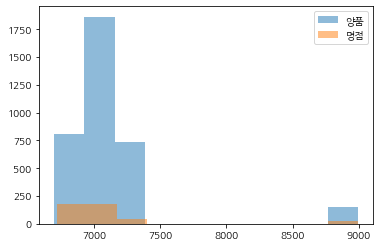

In [195]:
fun_plot_hist(data2, 'TAT_6PHOS_4FIRE')

### < TAT_7PASTE >

In [196]:
data2[data2['TAT_7PASTE'] != 0]

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
99,명점,100,LOT-105,PNL-20,86,220.0,88.0,69,156.0,336.0,...,6453.0,540.0,78.0,387.0,76.0,333.0,94.0,6720.0,NaN,10074.0
110,양품,111,LOT-106,PNL-11,78,240.0,78.0,69,140.0,368.0,...,6573.0,530.0,78.0,420.0,78.0,396.0,88.0,6865.0,NaN,9750.0
300,양품,301,LOT-116,PNL-01,88,220.0,86.0,72,136.0,384.0,...,6453.0,530.0,100.0,396.0,82.0,309.0,94.0,6930.0,NaN,9751.0
1247,양품,1248,LOT-163,PNL-08,88,220.0,84.0,69,132.0,388.0,...,6480.0,530.0,78.0,402.0,80.0,396.0,84.0,6960.0,NaN,10074.0
1389,양품,1390,LOT-170,PNL-10,88,220.0,86.0,75,132.0,368.0,...,6600.0,540.0,76.0,405.0,100.0,366.0,86.0,6960.0,NaN,10074.0
1740,양품,1741,LOT-188,PNL-01,80,240.0,80.0,69,138.0,412.0,...,6600.0,530.0,100.0,390.0,80.0,396.0,88.0,6840.0,NaN,10640.0
1872,양품,1873,LOT-194,PNL-13,86,210.0,84.0,69,142.0,356.0,...,6507.0,530.0,88.0,432.0,86.0,399.0,84.0,6960.0,NaN,NaN
2086,양품,2087,LOT-205,PNL-07,86,210.0,88.0,75,156.0,348.0,...,6507.0,540.0,80.0,390.0,80.0,309.0,86.0,7080.0,NaN,9749.0
2359,양품,2360,LOT-218,PNL-20,88,210.0,84.0,72,138.0,396.0,...,6453.0,540.0,78.0,414.0,78.0,396.0,84.0,7230.0,NaN,10076.0
2556,양품,2557,LOT-228,PNL-17,88,210.0,84.0,69,160.0,384.0,...,6480.0,530.0,80.0,369.0,80.0,396.0,86.0,7140.0,NaN,10076.0


### < TAT_8AGING >

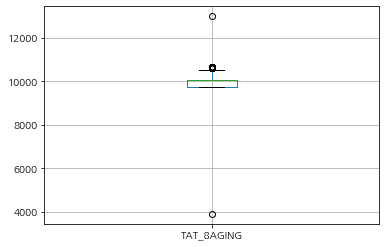

In [197]:
data2.boxplot(['TAT_8AGING'])

In [198]:
Q1 = data2['TAT_8AGING'].quantile(.25)
Q3 = data2['TAT_8AGING'].quantile(.75)
IQR = Q3 - Q1
Min = Q1 - 1.5*IQR
Max = Q3 + 1.5*IQR


print(Q1, Q3, IQR, Min, Max)

9750.0 10076.0 326.0 9261.0 10565.0


In [199]:
outlier = data2[data2['TAT_8AGING'] > 12000]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
1598,양품,1599,LOT-180,PNL-19,88,220.0,88.0,69,154.0,352.0,...,6600.0,540.0,80.0,306.0,78.0,309.0,82.0,6750.0,0.0,12999.0


In [200]:
outlier = data2[data2['TAT_8AGING'] < 4000]
outlier

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
1042,양품,1043,LOT-153,PNL-03,88,240.0,84.0,66,186.0,336.0,...,6447.0,530.0,80.0,390.0,80.0,396.0,78.0,7115.0,0.0,3900.0


/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/piai/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


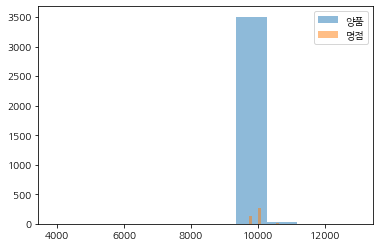

In [201]:
fun_plot_hist(data2, 'TAT_8AGING')

# ######이상치 제거

In [229]:
data.isnull().sum()

JUDGE                        0
INDEX                        0
LOT_ID                       0
PANEL_ID                     0
TIME_1BLACK                  0
TIME_2AG                     0
TIME_3BUS                    0
TIME_4DIELEC                 0
TIME_5MGO                    0
TIME_6PHOS                   0
TIME_7PASTE                  0
TIME_8AGING                  0
TAT_1BLACK_1PRINT            0
TAT_1BLACK_2RTD              4
TAT_2AG_1PRINT               6
TAT_2AG_2RTD                 0
TAT_2AG_3EXPOSURE           88
TAT_3BUS_1DEVELOP           34
TAT_3BUS_2FIRE               9
TAT_4DIELEC_FIRE           165
TAT_5MGO                    57
TAT_6PHOS_1R_1DISPENSER     25
TAT_6PHOS_1R_2DRY           25
TAT_6PHOS_2G_1DISPENSER     47
TAT_6PHOS_2G_2DRY           57
TAT_6PHOS_3B_1DISPENSER     31
TAT_6PHOS_4FIRE             27
TAT_7PASTE                  16
TAT_8AGING                  44
dtype: int64

#  # 결측치 처리

TAT_1BLACK_2RTD              4

TAT_2AG_1PRINT               6

TAT_2AG_2RTD                 0

TAT_2AG_3EXPOSURE           88

TAT_3BUS_1DEVELOP           34

TAT_3BUS_2FIRE               9

TAT_4DIELEC_FIRE           165

TAT_5MGO                    57

In [230]:
# 결측치

In [231]:
data

,JUDGE,INDEX,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,양품,1,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,양품,2,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,양품,3,LOT-101,PNL-03,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,...,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,양품,4,LOT-101,PNL-04,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,...,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,양품,5,LOT-101,PNL-05,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,...,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,명점,3996,LOT-300,PNL-16,2019-08-01 21:38,2019-08-02 2:58,2019-08-02 8:38,2019-08-07 11:18,2019-08-12 1:18,2019-08-04 14:38,...,6447.0,530.0,78.0,393.0,80.0,399.0,86.0,7016.0,0.0,10077.0
3996,양품,3997,LOT-300,PNL-17,2019-08-01 22:23,2019-08-02 3:43,2019-08-02 9:23,2019-08-07 12:03,2019-08-12 2:03,2019-08-04 15:23,...,NaN,530.0,80.0,405.0,78.0,402.0,78.0,6990.0,0.0,10075.0
3997,양품,3998,LOT-300,PNL-18,2019-08-01 23:07,2019-08-02 4:27,2019-08-02 10:07,2019-08-07 12:47,2019-08-12 2:47,2019-08-04 16:07,...,6447.0,540.0,78.0,375.0,100.0,360.0,84.0,7025.0,0.0,NaN
3998,명점,3999,LOT-300,PNL-19,2019-08-01 23:51,2019-08-02 5:11,2019-08-02 10:51,2019-08-07 13:31,2019-08-12 3:31,2019-08-04 16:51,...,6747.0,530.0,78.0,NaN,90.0,375.0,82.0,6960.0,0.0,9750.0


# 결측치 대체를 위한 양품 불량 평균

In [232]:
data_null = data[['JUDGE', 'TAT_1BLACK_1PRINT']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_1BLACK_1PRINT'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    87.742793
1    87.297424
Name: TAT_1BLACK_1PRINT, dtype: float64

In [233]:
data_null = data[['JUDGE', 'TAT_1BLACK_2RTD']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_1BLACK_2RTD'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    219.196078
1    222.018779
Name: TAT_1BLACK_2RTD, dtype: float64

In [185]:
data_null = data[['JUDGE', 'TAT_2AG_1PRINT']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_2AG_1PRINT'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    84.526906
1    84.645540
Name: TAT_2AG_1PRINT, dtype: float64

In [186]:
data_null = data[['JUDGE', 'TAT_2AG_2RTD']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_2AG_2RTD'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    70.628324
1    70.032787
Name: TAT_2AG_2RTD, dtype: float64

In [187]:
data_null = data[['JUDGE', 'TAT_2AG_3EXPOSURE']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_2AG_3EXPOSURE'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    161.671531
1    165.841727
Name: TAT_2AG_3EXPOSURE, dtype: float64

In [188]:
data_null = data[['JUDGE', 'TAT_3BUS_1DEVELOP']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_3BUS_1DEVELOP'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    371.476593
1    366.323810
Name: TAT_3BUS_1DEVELOP, dtype: float64

In [189]:
data_null = data[['JUDGE', 'TAT_3BUS_2FIRE']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_3BUS_2FIRE'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    6970.505048
1    6981.663529
Name: TAT_3BUS_2FIRE, dtype: float64

In [190]:
data_null = data[['JUDGE', 'TAT_4DIELEC_FIRE']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_4DIELEC_FIRE'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    6511.868852
1    6589.016706
Name: TAT_4DIELEC_FIRE, dtype: float64

In [191]:
data_null = data[['JUDGE', 'TAT_5MGO']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_5MGO'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    533.763135
1    534.763033
Name: TAT_5MGO, dtype: float64

In [192]:
data_null = data[['JUDGE', 'TAT_6PHOS_1R_1DISPENSER']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_6PHOS_1R_1DISPENSER'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    79.996062
1    81.219048
Name: TAT_6PHOS_1R_1DISPENSER, dtype: float64

In [193]:
data_null = data[['JUDGE', 'TAT_6PHOS_1R_2DRY']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_6PHOS_1R_2DRY'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    403.676048
1    409.542654
Name: TAT_6PHOS_1R_2DRY, dtype: float64

In [194]:
data_null = data[['JUDGE', 'TAT_6PHOS_2G_1DISPENSER']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_6PHOS_2G_1DISPENSER'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    80.835127
1    81.550827
Name: TAT_6PHOS_2G_1DISPENSER, dtype: float64

In [195]:
data_null = data[['JUDGE', 'TAT_6PHOS_2G_2DRY']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_6PHOS_2G_2DRY'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    377.573133
1    373.471564
Name: TAT_6PHOS_2G_2DRY, dtype: float64

In [143]:
data_null = data[['JUDGE', 'TAT_6PHOS_3B_1DISPENSER']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_6PHOS_3B_1DISPENSER'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    83.945275
1    83.896226
Name: TAT_6PHOS_3B_1DISPENSER, dtype: float64

In [144]:
data_null = data[['JUDGE', 'TAT_6PHOS_4FIRE']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_6PHOS_4FIRE'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    7121.326669
1    7078.966825
Name: TAT_6PHOS_4FIRE, dtype: float64

In [145]:
data_null = data[['JUDGE', 'TAT_7PASTE']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_7PASTE'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    0.0
1    0.0
Name: TAT_7PASTE, dtype: float64

In [146]:
data_null = data[['JUDGE', 'TAT_8AGING']]
data_null['JUDGE'] = np.where(data_null['JUDGE']=='양품', 0, 1)

grouped = data_null['TAT_8AGING'].groupby(data_null['JUDGE'])
grouped.mean()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


JUDGE
0    9973.98188
1    9986.67217
Name: TAT_8AGING, dtype: float64

# 결측치 평균값으로 대체

In [234]:
data2 = pd.read_csv("/home/piai/PDP/Data Set/MFG_TAT2.csv", engine = "python", encoding='cp949')
data2.head()

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,양품,1,LOT-101,PNL-01,86,220.0,83.0,74,160.0,416.0,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,양품,2,LOT-101,PNL-02,86,210.0,84.0,71,150.0,372.0,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,양품,3,LOT-101,PNL-03,78,220.0,78.0,69,148.0,368.0,...,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,양품,4,LOT-101,PNL-04,86,210.0,84.0,69,178.0,416.0,...,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,양품,5,LOT-101,PNL-05,86,210.0,84.0,69,132.0,380.0,...,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0


In [98]:
data2.isnull().sum()

JUDGE                        0
INDEX                        0
LOT_ID                       0
PANEL_ID                     0
TAT_1BLACK_1PRINT            0
TAT_1BLACK_2RTD              4
TAT_2AG_1PRINT               6
TAT_2AG_2RTD                 0
TAT_2AG_3EXPOSURE           88
TAT_3BUS_1DEVELOP           34
TAT_3BUS_2FIRE               9
TAT_4DIELEC_FIRE           165
TAT_5MGO                    57
TAT_6PHOS_1R_1DISPENSER     25
TAT_6PHOS_1R_2DRY           25
TAT_6PHOS_2G_1DISPENSER     47
TAT_6PHOS_2G_2DRY           57
TAT_6PHOS_3B_1DISPENSER     31
TAT_6PHOS_4FIRE             27
TAT_7PASTE                  16
TAT_8AGING                  44
dtype: int64

In [235]:
data2['JUDGE'] = np.where(data2['JUDGE']=='양품', 0, 1)

In [236]:
data2

,JUDGE,INDEX,LOT_ID,PANEL_ID,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,0,1,LOT-101,PNL-01,86,220.0,83.0,74,160.0,416.0,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,0,2,LOT-101,PNL-02,86,210.0,84.0,71,150.0,372.0,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,0,3,LOT-101,PNL-03,78,220.0,78.0,69,148.0,368.0,...,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,0,4,LOT-101,PNL-04,86,210.0,84.0,69,178.0,416.0,...,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,0,5,LOT-101,PNL-05,86,210.0,84.0,69,132.0,380.0,...,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,3996,LOT-300,PNL-16,86,220.0,86.0,69,202.0,328.0,...,6447.0,530.0,78.0,393.0,80.0,399.0,86.0,7016.0,0.0,10077.0
3996,0,3997,LOT-300,PNL-17,87,220.0,86.0,69,174.0,336.0,...,NaN,530.0,80.0,405.0,78.0,402.0,78.0,6990.0,0.0,10075.0
3997,0,3998,LOT-300,PNL-18,84,210.0,82.0,72,280.0,392.0,...,6447.0,540.0,78.0,375.0,100.0,360.0,84.0,7025.0,0.0,NaN
3998,1,3999,LOT-300,PNL-19,86,220.0,84.0,69,164.0,376.0,...,6747.0,530.0,78.0,NaN,90.0,375.0,82.0,6960.0,0.0,9750.0


#### 결측치를 대체하기 위한 라이브러리

In [237]:
import math

In [238]:
# TAT_1BLACK_1PRINT

for i in range(len(data2)):
    if (math.isnan(data2['TAT_1BLACK_1PRINT'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_1BLACK_1PRINT'][i] = 88
    elif (math.isnan(data2['TAT_1BLACK_1PRINT'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_1BLACK_1PRINT'][i] = 87

In [239]:
data2['TAT_1BLACK_1PRINT'].isnull().sum()

0

In [240]:
data2['TAT_1BLACK_2RTD'].isnull().sum()

4

In [241]:
# TAT_1BLACK_2RTD

for i in range(len(data2)):
    if (math.isnan(data2['TAT_1BLACK_2RTD'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_1BLACK_2RTD'][i] = 219.20
    elif (math.isnan(data2['TAT_1BLACK_2RTD'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_1BLACK_2RTD'][i] = 222.02

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [242]:
data2['TAT_1BLACK_2RTD'].isnull().sum()

0

In [166]:
# TAT_2AG_1PRINT

for i in range(len(data2)):
    if (math.isnan(data2['TAT_2AG_1PRINT'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_2AG_1PRINT'][i] = 84.53
    elif (math.isnan(data2['TAT_2AG_1PRINT'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_2AG_1PRINT'][i] = 84.65

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [168]:
data2['TAT_2AG_1PRINT'].isnull().sum()

0

In [196]:
# TAT_2AG_2RTD

for i in range(len(data2)):
    if (math.isnan(data2['TAT_2AG_2RTD'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_2AG_2RTD'][i] = 70.63
    elif (math.isnan(data2['TAT_2AG_2RTD'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_2AG_2RTD'][i] = 70.03
        
data2['TAT_2AG_2RTD'].isnull().sum()

0

In [197]:
# TAT_2AG_3EXPOSURE

for i in range(len(data2)):
    if (math.isnan(data2['TAT_2AG_3EXPOSURE'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_2AG_3EXPOSURE'][i] = 161.67
    elif (math.isnan(data2['TAT_2AG_3EXPOSURE'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_2AG_3EXPOSURE'][i] = 165.84
        
data2['TAT_2AG_3EXPOSURE'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0

In [198]:
# TAT_3BUS_1DEVELOP

for i in range(len(data2)):
    if (math.isnan(data2['TAT_3BUS_1DEVELOP'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_3BUS_1DEVELOP'][i] = 371.48
    elif (math.isnan(data2['TAT_3BUS_1DEVELOP'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_3BUS_1DEVELOP'][i] = 366.32
        
data2['TAT_3BUS_1DEVELOP'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0

In [199]:
# TAT_3BUS_2FIRE

for i in range(len(data2)):
    if (math.isnan(data2['TAT_3BUS_2FIRE'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_3BUS_2FIRE'][i] = 6970.51
    elif (math.isnan(data2['TAT_3BUS_2FIRE'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_3BUS_2FIRE'][i] = 6981.66
        
data2['TAT_3BUS_2FIRE'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0

In [200]:
# TAT_4DIELEC_FIRE

for i in range(len(data2)):
    if (math.isnan(data2['TAT_4DIELEC_FIRE'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_4DIELEC_FIRE'][i] = 6511.87
    elif (math.isnan(data2['TAT_4DIELEC_FIRE'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_4DIELEC_FIRE'][i] = 6589.02
        
data2['TAT_4DIELEC_FIRE'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0

In [201]:
# TAT_5MGO

for i in range(len(data2)):
    if (math.isnan(data2['TAT_5MGO'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_5MGO'][i] = 533.76
    elif (math.isnan(data2['TAT_5MGO'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_5MGO'][i] = 534.76
        
data2['TAT_5MGO'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0

In [202]:
# TAT_6PHOS_1R_1DISPENSER

for i in range(len(data2)):
    if (math.isnan(data2['TAT_6PHOS_1R_1DISPENSER'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_6PHOS_1R_1DISPENSER'][i] = 80
    elif (math.isnan(data2['TAT_6PHOS_1R_1DISPENSER'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_6PHOS_1R_1DISPENSER'][i] = 81.22
        
data2['TAT_6PHOS_1R_1DISPENSER'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0

In [203]:
# TAT_6PHOS_1R_2DRY

for i in range(len(data2)):
    if (math.isnan(data2['TAT_6PHOS_1R_2DRY'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_6PHOS_1R_2DRY'][i] = 403.68
    elif (math.isnan(data2['TAT_6PHOS_1R_2DRY'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_6PHOS_1R_2DRY'][i] = 409.54
        
data2['TAT_6PHOS_1R_2DRY'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0

In [204]:
# TAT_6PHOS_2G_1DISPENSER

for i in range(len(data2)):
    if (math.isnan(data2['TAT_6PHOS_2G_1DISPENSER'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_6PHOS_2G_1DISPENSER'][i] = 80.84
    elif (math.isnan(data2['TAT_6PHOS_2G_1DISPENSER'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_6PHOS_2G_1DISPENSER'][i] = 81.55
        
data2['TAT_6PHOS_2G_1DISPENSER'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0

In [205]:
# TAT_6PHOS_2G_2DRY

for i in range(len(data2)):
    if (math.isnan(data2['TAT_6PHOS_2G_2DRY'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_6PHOS_2G_2DRY'][i] = 377.57
    elif (math.isnan(data2['TAT_6PHOS_2G_2DRY'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_6PHOS_2G_2DRY'][i] = 373.47
        
data2['TAT_6PHOS_2G_2DRY'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0

In [206]:
# TAT_6PHOS_3B_1DISPENSER

for i in range(len(data2)):
    if (math.isnan(data2['TAT_6PHOS_3B_1DISPENSER'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_6PHOS_3B_1DISPENSER'][i] = 83.95
    elif (math.isnan(data2['TAT_6PHOS_3B_1DISPENSER'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_6PHOS_3B_1DISPENSER'][i] = 83.90
        
data2['TAT_6PHOS_3B_1DISPENSER'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0

In [207]:
# TAT_3BUS_2FIRE

for i in range(len(data2)):
    if (math.isnan(data2['TAT_6PHOS_4FIRE'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_6PHOS_4FIRE'][i] = 7121.33
    elif (math.isnan(data2['TAT_6PHOS_4FIRE'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_6PHOS_4FIRE'][i] = 7078.97
        
data2['TAT_6PHOS_4FIRE'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0

In [208]:
# TAT_TAT_8AGING

for i in range(len(data2)):
    if (math.isnan(data2['TAT_8AGING'][i])==True) and (data2['JUDGE'][i] == 0) :
        data2['TAT_8AGING'][i] = 9973.98
    elif (math.isnan(data2['TAT_8AGING'][i])==True) and (data2['JUDGE'][i] == 1):
        data2['TAT_8AGING'][i] = 9986.67
        
data2['TAT_8AGING'].isnull().sum()

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0

In [209]:
data2.isnull().sum()

JUDGE                       0
LOT_ID                      0
PANEL_ID                    0
TAT_1BLACK_1PRINT           0
TAT_1BLACK_2RTD             0
TAT_2AG_1PRINT              0
TAT_2AG_2RTD                0
TAT_2AG_3EXPOSURE           0
TAT_3BUS_1DEVELOP           0
TAT_3BUS_2FIRE              0
TAT_4DIELEC_FIRE            0
TAT_5MGO                    0
TAT_6PHOS_1R_1DISPENSER     0
TAT_6PHOS_1R_2DRY           0
TAT_6PHOS_2G_1DISPENSER     0
TAT_6PHOS_2G_2DRY           0
TAT_6PHOS_3B_1DISPENSER     0
TAT_6PHOS_4FIRE             0
TAT_7PASTE                 16
TAT_8AGING                  0
dtype: int64

In [18]:
data2['TAT_7PASTE'].describe()

count    3984.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: TAT_7PASTE, dtype: float64

In [214]:
data2 = data2.drop(['TAT_7PASTE'], axis=1)

In [215]:
data2.isnull().sum()

JUDGE                      0
LOT_ID                     0
PANEL_ID                   0
TAT_1BLACK_1PRINT          0
TAT_1BLACK_2RTD            0
TAT_2AG_1PRINT             0
TAT_2AG_2RTD               0
TAT_2AG_3EXPOSURE          0
TAT_3BUS_1DEVELOP          0
TAT_3BUS_2FIRE             0
TAT_4DIELEC_FIRE           0
TAT_5MGO                   0
TAT_6PHOS_1R_1DISPENSER    0
TAT_6PHOS_1R_2DRY          0
TAT_6PHOS_2G_1DISPENSER    0
TAT_6PHOS_2G_2DRY          0
TAT_6PHOS_3B_1DISPENSER    0
TAT_6PHOS_4FIRE            0
TAT_8AGING                 0
dtype: int64

# csv 파일로 저장

In [ ]:
data2.to_csv('/home/piai/PDP/Data Set/MFG_TAT_new.csv')

# TAT 이상치 제거

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_raw_tat = pd.read_csv('Data Set/MFG_TAT.csv',engine='python',encoding='cp949')
df_raw_tat.head()

,JUDGE,INDEX,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,양품,1,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,양품,2,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,양품,3,LOT-101,PNL-03,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,...,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,양품,4,LOT-101,PNL-04,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,...,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,양품,5,LOT-101,PNL-05,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,...,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0


In [3]:
idx_nm1 = df_raw_tat[df_raw_tat['TAT_3BUS_1DEVELOP']<50].index
df_raw_tat=df_raw_tat.drop(idx_nm1)
df_raw_tat['TAT_3BUS_1DEVELOP']

0       416.0
1       372.0
2       368.0
3       416.0
4       380.0
        ...  
3995    328.0
3996    336.0
3997    392.0
3998    376.0
3999    332.0
Name: TAT_3BUS_1DEVELOP, Length: 3999, dtype: float64

In [4]:
idx_nm2 = df_raw_tat[df_raw_tat['TAT_3BUS_2FIRE']>8700].index
df_raw_tat=df_raw_tat.drop(idx_nm2)
df_raw_tat['TAT_3BUS_2FIRE']

0       6900.0
1       6693.0
2       6747.0
3       7137.0
4       7527.0
         ...  
3995    7047.0
3996    6813.0
3997    6873.0
3998    6687.0
3999    6987.0
Name: TAT_3BUS_2FIRE, Length: 3984, dtype: float64

In [5]:
idx_nm3 = df_raw_tat[df_raw_tat['TAT_4DIELEC_FIRE']>8700].index
df_raw_tat=df_raw_tat.drop(idx_nm3)
df_raw_tat['TAT_4DIELEC_FIRE']

0       6447.0
1       6600.0
2       6597.0
3       6420.0
4       6453.0
         ...  
3995    6447.0
3996       NaN
3997    6447.0
3998    6747.0
3999    6507.0
Name: TAT_4DIELEC_FIRE, Length: 3962, dtype: float64

In [6]:
idx_nm3 = df_raw_tat[df_raw_tat['TAT_4DIELEC_FIRE']>8700].index
df_raw_tat=df_raw_tat.drop(idx_nm3)
df_raw_tat['TAT_4DIELEC_FIRE']

0       6447.0
1       6600.0
2       6597.0
3       6420.0
4       6453.0
         ...  
3995    6447.0
3996       NaN
3997    6447.0
3998    6747.0
3999    6507.0
Name: TAT_4DIELEC_FIRE, Length: 3962, dtype: float64

In [7]:
# 디스펜서 빨강색의 이상치를 제거하면 그린,블루도 모두 제거됨

In [8]:
idx_nm5 = df_raw_tat[df_raw_tat['TAT_8AGING']<4000].index
idx_nm6 = df_raw_tat[df_raw_tat['TAT_8AGING']>12000].index
df_raw_tat=df_raw_tat.drop(idx_nm5)
df_raw_tat=df_raw_tat.drop(idx_nm6)
df_raw_tat['TAT_8AGING']

0       10074.0
1       10075.0
2       10645.0
3       10076.0
4       10074.0
         ...   
3995    10077.0
3996    10075.0
3997        NaN
3998     9750.0
3999    10074.0
Name: TAT_8AGING, Length: 3960, dtype: float64

In [ ]:
df_raw_tat.to_csv('NEW.csv',encoding='cp949')